# Exploring Naive Bayes

In this notebook we are going to introduce a simple example to classify a lot of urls in their category using Naive Bayes. Do not worry about the results we get this time. Just focus on the implementation, because we'll make a brief introduction to two preprocessing steps.

Are you wondering if this is already NLP? Well yes, we are getting there, but NLP (natural language processing) will have its own lesson where we'll explain deeper each step.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

**1. Load the dataset**

In [3]:
df=pd.read_csv('../assets/url_dataset.csv')

**2. Let's look at the distribution of our target variable: the category column**

Text(0, 0.5, 'Total Number Of Individual Category for Training')

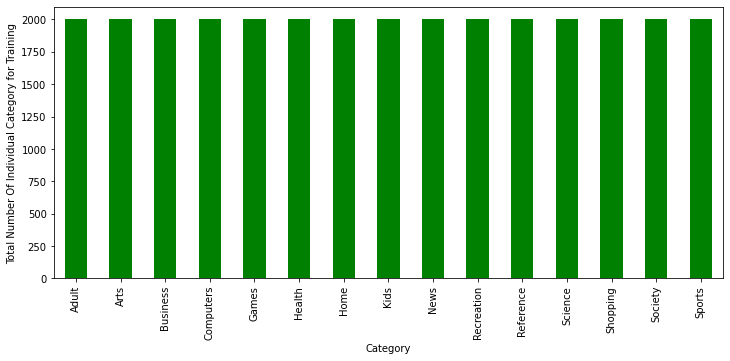

In [4]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Training')

Observations: In this case, we have a uniform distribution.

**3. Separate target variable (category) from predictor variable (url)**

In [5]:
#Separate predictor from target

X =df['URL']
y=df['Category']

**4. Split data in train and test sets**

In [6]:
#Split data in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)

**5. Create a pipeline with 2 preprocessing steps and 1 modeling step**

Here, we'll make a brief introduction to CountVectorizer and TfidfTransformer as preprocessing steps for managing texts. Don't worry, you will learn much more about them in the NLP module.

- CountVectorizer:

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. It works by creating a matrix in which each unique word is represented by a column of the matrix.
This implementation produces a sparse representation of the counts using scipy.sparse.

- TfidfTransformer:

It transforms a count matrix to a normalized tf or tf-idf representation. Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

In [7]:
# Create a pipeline with the two preprocessing steps and the modeling step with the algorithm chosen

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

**6. Let's check some results we got**

In [8]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

y_pred = text_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.5798207299653638, 0.39744444444444443, 0.3950741953806211, None)

In [9]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,text_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,text_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9343809523809524
Naive Bayes Test Accuracy =  0.39744444444444443


**7. An example of a randomized search using the classifier pipeline (text_clf)**

In [10]:
# Look for the best parameters with a Randomized Search

from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf', MultinomialNB())]),
                   n_iter=5,
                   param_distributions={'clf__alpha': (0.01, 0.001),
                                        'tfidf__use_idf': (True, False),
                                        'vect__ngram_range': [(1, 1), (1, 2)]})

In [12]:
gs_clf.best_params_

{'vect__ngram_range': (1, 1), 'tfidf__use_idf': True, 'clf__alpha': 0.01}

In [11]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9955714285714286
Naive Bayes Test Accuracy =  0.41155555555555556


Again, we are not focusing on the results this time, just on the implementation for a text classifier using Naive Bayes. But, as you are already becoming a machine learning engineer, what is your opinion about the results we got? Is it a good result? Is there any reason for that result? any possible solution?

Now, using that score, we will try to predict a couple of urls.

In [30]:
#Predict a couple of url categories

print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))

['Computers']
['Kids']


Source: 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

